<a href="https://colab.research.google.com/github/karthikmax/Travel-Package-Prediction/blob/main/Travel_Package_KarthikKumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To predict which customer is more likely to purchase the long term travel package.

Data Dictionary

Customer details:

    CustomerID: Unique customer ID
    ProdTaken: Product taken flag
    Age: Age of customer
    PreferredLoginDevice: Preferred login device of the customer in last month
    CityTier: City tier
    Occupation: Occupation of customer
    Gender: Gender of customer
    NumberOfPersonVisited: Total number of person came with customer
    PreferredPropertyStar: Preferred hotel property rating by customer
    MaritalStatus: Marital status of customer
    NumberOfTrips: Average number of the trip in a year by customer
    Passport: Customer passport flag
    OwnCar: Customers owns a car flag
    NumberOfChildrenVisited: Total number of children visit with customer
    Designation: Designation of the customer in the current organization
    MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

    PitchSatisfactionScore: Sales pitch satisfactory score
    ProductPitched: Product pitched by a salesperson
    NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
    DurationOfPitch: Duration of the pitch by a salesman to customer


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from scipy import stats

from xgboost import XGBClassifier



In [ ]:
#set current working directory to where the files are
os.chdir('\Projects\Travel Package Purchase Prediction')

In [ ]:
tourism = pd.read_excel('Tourism.xlsx',sheet_name='Tourism')
tourism.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [ ]:
tourism.shape

(4888, 20)

In [ ]:
tourism.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

There seem to be lot of missing values. This have to be addressed before proceeding further. 

In [ ]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [ ]:
tourism.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [ ]:
tourism['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [ ]:
tourism['ProdTaken'].value_counts(normalize=True)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

Data is clearly imbalanced. 19% of the customers have taken the travel package offered.

In [ ]:
tourism['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Hmm... That is not right. Spelling mistake. Lets replace that properly

In [ ]:
tourism['Gender'] = tourism['Gender'].replace('Fe Male','Female')
tourism['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [ ]:
for feature in tourism.columns: # Loop through all columns in the dataframe
    if tourism[feature].dtype == 'object': # Only apply for columns with categorical strings
        tourism[feature] = pd.Categorical(tourism[feature])# Replace strings with an integer
tourism.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [ ]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CustomerID               4888 non-null   int64   
 1   ProdTaken                4888 non-null   int64   
 2   Age                      4662 non-null   float64 
 3   TypeofContact            4863 non-null   category
 4   CityTier                 4888 non-null   int64   
 5   DurationOfPitch          4637 non-null   float64 
 6   Occupation               4888 non-null   category
 7   Gender                   4888 non-null   category
 8   NumberOfPersonVisited    4888 non-null   int64   
 9   NumberOfFollowups        4843 non-null   float64 
 10  ProductPitched           4888 non-null   category
 11  PreferredPropertyStar    4862 non-null   float64 
 12  MaritalStatus            4888 non-null   category
 13  NumberOfTrips            4748 non-null   float64 
 14  Passport

In [ ]:
tourism.groupby(['Gender','MaritalStatus','Designation']).agg({'Age':['mean','median']})

Age       
                                          mean median
Gender MaritalStatus Designation                     
Female Divorced      AVP             47.738095   47.0
                     Executive       35.434343   34.0
                     Manager         37.044118   36.0
                     Senior Manager  41.833333   40.5
                     VP              50.600000   51.5
       Married       AVP             47.100000   48.0
                     Executive       34.682657   33.0
                     Manager         37.975460   38.0
                     Senior Manager  41.188312   38.0
                     VP              49.681818   51.0
       Single        AVP             50.395349   53.0
                     Executive       30.335052   30.0
                     Manager         37.513514   35.5
                     Senior Manager  41.000000   40.5
                     VP              45.722222   47.0
       Unmarried     AVP             42.200000   40.0
                     Executive       32.338028   33.0
                     Manager         37.430464   36.0
                     Senior Manager  39.078947   36.5
                     VP                    NaN    NaN
Male   Divorced      AVP             48.456522   49.5
                     Executive       34.152709   32.0
                     Manager         36.540541   34.0
                     Senior Manager  41.357143   39.5
                     VP              46.937500   46.0
       Married       AVP             48.270833   50.0
                     Executive       34.024742   32.0
                     Manager         37.348361   36.0
                     Senior Manager  39.835556   39.0
                     VP              46.597561   46.0
       Single        AVP             47.256410   48.0
                     Executive       30.520913   30.0
                     Manager         37.487395   35.0
                     Senior Manager  44.346154   48.0
                     VP              50.323529   52.0
       Unmarried     AVP             39.000000   39.0
                     Executive       31.928571   32.0
                     Manager         37.354651   36.0
                     Senior Manager  39.904255   38.0
                     VP                    NaN    NaN

In [ ]:
tourism['Age'] = tourism.groupby(['Gender','MaritalStatus','Designation'])['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
tourism.groupby(['Gender','MaritalStatus']).agg({'DurationOfPitch':['mean','median']})

DurationOfPitch       
                                mean median
Gender MaritalStatus                       
Female Divorced            15.694215   14.0
       Married             15.543839   13.0
       Single              14.772727   12.5
       Unmarried           15.343234   13.0
Male   Divorced            15.171963   12.0
       Married             15.802594   14.0
       Single              15.334038   13.0
       Unmarried           15.467018   13.0

In [ ]:
tourism['DurationOfPitch'] = tourism.groupby(['Gender','MaritalStatus'])['DurationOfPitch'].transform(lambda x: x.fillna(x.median()))

In [ ]:
tourism.groupby(['Gender','MaritalStatus']).agg({'NumberOfTrips':['mean','median']})

NumberOfTrips       
                              mean median
Gender MaritalStatus                     
Female Divorced           3.231383    3.0
       Married            3.315367    3.0
       Single             2.851459    2.0
       Unmarried          3.531353    3.0
Male   Divorced           3.237477    3.0
       Married            3.307914    3.0
       Single             3.023438    2.0
       Unmarried          3.232190    3.0

In [ ]:
tourism['NumberOfTrips'] = tourism.groupby(['Gender','MaritalStatus'])['NumberOfTrips'].transform(lambda x: x.fillna(x.median()))

In [ ]:
tourism['TypeofContact'].fillna(tourism['TypeofContact'].value_counts().index[0],inplace=True)

In [ ]:
tourism['NumberOfFollowups'] = tourism.groupby(['Gender','MaritalStatus'])['NumberOfFollowups'].transform(lambda x: x.fillna(x.median()))

In [ ]:
tourism['PreferredPropertyStar'] = tourism.groupby(['Gender','MaritalStatus','Designation'])['PreferredPropertyStar'].transform(lambda x: x.fillna(round(x.median(),0)))

In [ ]:
tourism.groupby(['Gender','MaritalStatus']).agg({'NumberOfChildrenVisited':['mean','median']})

NumberOfChildrenVisited       
                                        mean median
Gender MaritalStatus                               
Female Divorced                     1.072000    1.0
       Married                      1.222096    1.0
       Single                       0.989362    1.0
       Unmarried                    1.333333    1.0
Male   Divorced                     1.215054    1.0
       Married                      1.206560    1.0
       Single                       1.003846    1.0
       Unmarried                    1.437995    1.0

In [ ]:
tourism['NumberOfChildrenVisited'] = tourism.groupby(['Gender','MaritalStatus'])['NumberOfChildrenVisited'].transform(lambda x: x.fillna(round(x.median(),0)))

In [ ]:
tourism.groupby(['Gender','Occupation','Designation']).agg({'MonthlyIncome':['mean','median']})

MonthlyIncome         
                                              mean   median
Gender Occupation     Designation                          
Female Free Lancer    AVP                      NaN      NaN
                      Executive                NaN      NaN
                      Manager                  NaN      NaN
                      Senior Manager           NaN      NaN
                      VP                       NaN      NaN
       Large Business AVP             31802.285714  31872.0
                      Executive       20145.692308  20748.0
                      Manager         21498.727273  22198.5
                      Senior Manager  27140.136364  28266.0
                      VP              36583.000000  36583.0
       Salaried       AVP             32357.785714  31890.0
                      Executive       20389.464286  20748.0
                      Manager         22475.547541  22826.0
                      Senior Manager  26894.714286  26713.0
                      VP              35910.764706  35846.0
       Small Business AVP             32105.935484  32171.5
                      Executive       19858.808163  20685.0
                      Manager         22638.588424  23071.0
                      Senior Manager  26719.591549  26383.5
                      VP              35083.800000  34845.0
Male   Free Lancer    AVP                      NaN      NaN
                      Executive       18929.000000  18929.0
                      Manager                  NaN      NaN
                      Senior Manager           NaN      NaN
                      VP                       NaN      NaN
       Large Business AVP             29959.000000  29959.0
                      Executive       19894.015873  20743.5
                      Manager         22237.873239  21997.0
                      Senior Manager  26779.900000  26838.5
                      VP              36071.000000  36071.0
       Salaried       AVP             32553.600000  32505.5
                      Executive       19778.290909  20371.5
                      Manager         22888.621076  22873.5
                      Senior Manager  26291.919192  26052.5
                      VP              36088.575000  35971.0
       Small Business AVP             32078.681818  32386.0
                      Executive       19828.914153  20582.0
                      Manager         22697.425428  22984.0
                      Senior Manager  26598.910112  26297.0
                      VP              35996.968750  35868.5

In [ ]:
tourism['MonthlyIncome'] = tourism.groupby(['Gender','Occupation','Designation'])['MonthlyIncome'].transform(lambda x: x.fillna(round(x.median(),0)))

In [ ]:
tourism.isnull().sum()

CustomerID                 0
ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

Ok.. So missing values have been imputed.

In [ ]:
cols = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
for cols in cols:
    print('='*50)
    print(tourism[cols].value_counts(normalize=True)*100)
    print('='*50)

Self Enquiry       70.969722
Company Invited    29.030278
Name: TypeofContact, dtype: float64
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: Occupation, dtype: float64
Male      59.656301
Female    40.343699
Name: Gender, dtype: float64
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: ProductPitched, dtype: float64
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: MaritalStatus, dtype: float64
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: Designation, dtype: float64


1. More self enquiry (organic) about travel packages as compared to company invited, which is good for the company
2. About 73% of customers prefer basic or deluxe package. We can dig into this further to see if occupation or designation matters more. Obviously, more income can lead to people choosing expensive packages
3. Almost half of the customers are married.

In [ ]:
tourism.groupby(['Designation'])['ProductPitched'].value_counts()

Designation     ProductPitched
AVP             Super Deluxe       342
Executive       Basic             1842
Manager         Deluxe            1732
Senior Manager  Standard           742
VP              King               230
Name: ProductPitched, dtype: int64

There is an one-on-one relationship here. If a customer has higher desgination, company doesn't pitch them cheaper packages.

In [ ]:
tourism.groupby(['Occupation'])['ProductPitched'].value_counts()

Occupation      ProductPitched
Free Lancer     Basic               2
Large Business  Basic             196
                Deluxe            124
                Standard           84
                Super Deluxe       18
                King               12
Salaried        Basic             924
                Deluxe            818
                Standard          338
                Super Deluxe      174
                King              114
Small Business  Deluxe            790
                Basic             720
                Standard          320
                Super Deluxe      150
                King              104
Name: ProductPitched, dtype: int64

In [ ]:
'''
def histboxplots(col, bins=None, figsize=(15,10)):
    fig, (ax_box2, ax_hist2) = plt.subplot(nrows=2,
                                sharex=True,
                                gridspec_kw = {"height_ratios": (.25, .75)},
                                figsize=figsize)
    sns.boxplot(col,ax=ax_box2,showMeans=True,color='orange')
    sns.distplot(col,ax=ax_hist2,kde=False,palette='pastel',bins=bins) if bins else sns.distplot(col,ax=ax2,kde=False,palette='pastel')
    ax2.axvline(np.mean(col), color='green', linestyle='--')
    ax2.axvline(np.median(col), color='green', linestyle='-')
'''

'\ndef histboxplots(col, bins=None, figsize=(15,10)):\n    fig, (ax_box2, ax_hist2) = plt.subplot(nrows=2,\n                                sharex=True,\n                                gridspec_kw = {"height_ratios": (.25, .75)},\n                                figsize=figsize)\n    sns.boxplot(col,ax=ax_box2,showMeans=True,color=\'orange\')\n    sns.distplot(col,ax=ax_hist2,kde=False,palette=\'pastel\',bins=bins) if bins else sns.distplot(col,ax=ax2,kde=False,palette=\'pastel\')\n    ax2.axvline(np.mean(col), color=\'green\', linestyle=\'--\')\n    ax2.axvline(np.median(col), color=\'green\', linestyle=\'-\')\n'

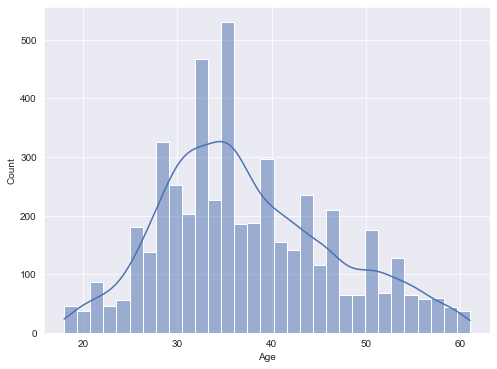

In [ ]:
sns.set({'figure.figsize': (8,6)})
sns.histplot(tourism['Age'],kde=True)
plt.show()

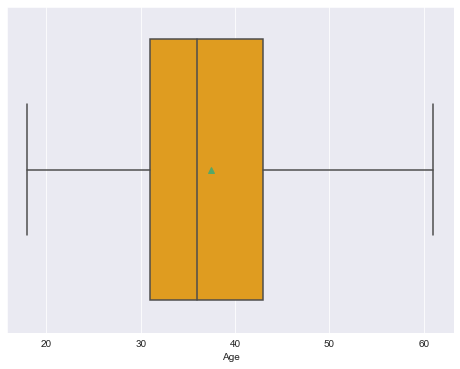

In [ ]:
sns.set({'figure.figsize': (8,6)})
sns.boxplot(tourism['Age'],showmeans=True,color='orange')
plt.show()

From the descriptive statistics and the graph above, the age is slightly right skewed. 
Also, mean and median are pretty close. The distribution is approximately normal and there are no outliers in the data

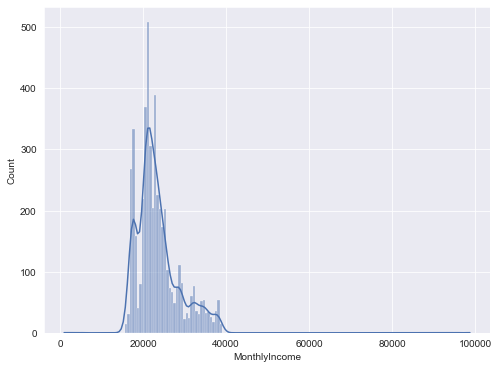

In [ ]:
sns.histplot(tourism['MonthlyIncome'],kde=True)
plt.show()

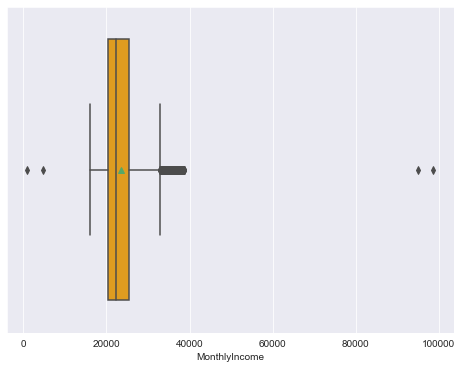

In [ ]:
sns.set({'figure.figsize': (8,6)})
sns.boxplot(tourism['MonthlyIncome'],showmeans=True,color='orange')
plt.show()

Monthly income is rightly skewed and we can see there are outliers present in the data. 

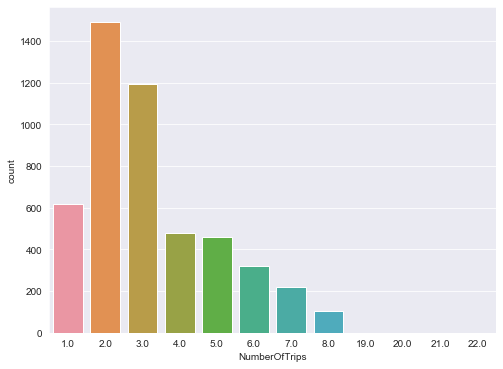

In [ ]:
sns.countplot(tourism['NumberOfTrips'])
plt.show()

Most customers have taken at least 2 or 3 trips a year

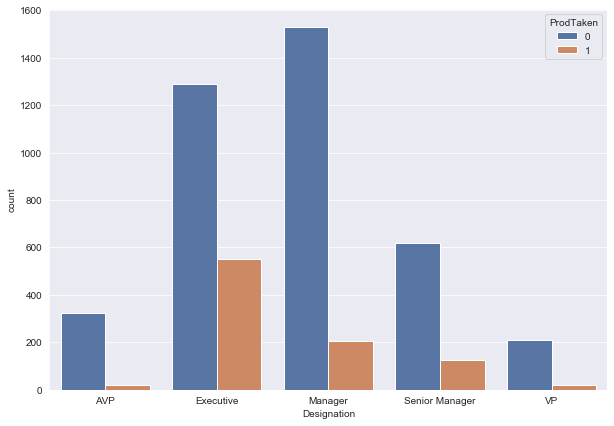

In [ ]:
sns.set({'figure.figsize':(10,7)})
sns.countplot(hue='ProdTaken',x='Designation',data=tourism)
plt.show()

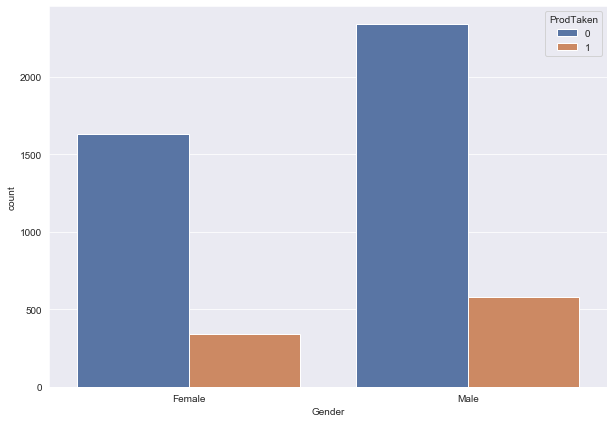

In [ ]:
sns.set({'figure.figsize':(10,7)})
sns.countplot(hue='ProdTaken',x='Gender',data=tourism)
plt.show()

More males choose travel package than female

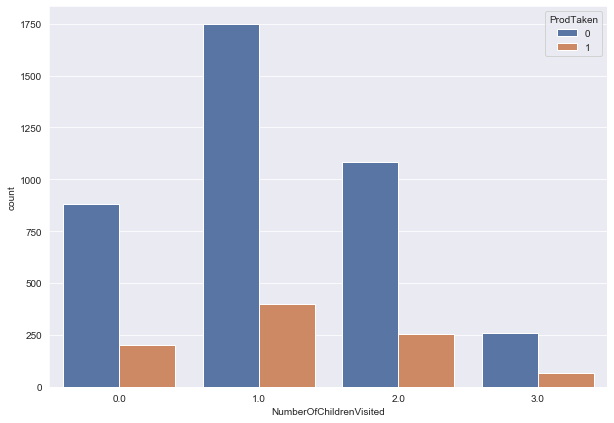

In [ ]:
sns.set({'figure.figsize':(10,7)})
sns.countplot(hue='ProdTaken',x='NumberOfChildrenVisited',data=tourism)
plt.show()

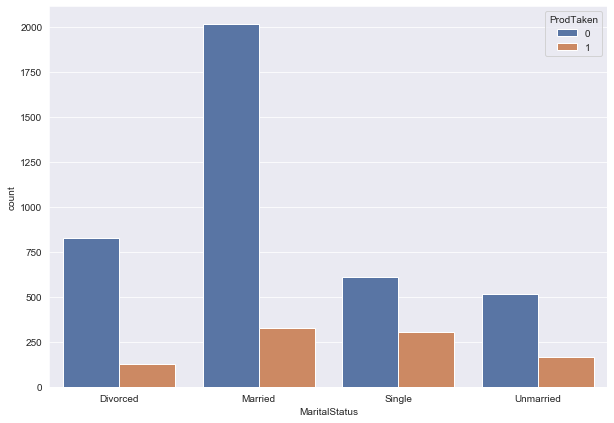

In [ ]:
sns.set({'figure.figsize':(10,7)})
sns.countplot(hue='ProdTaken',x='MaritalStatus',data=tourism)
plt.show()

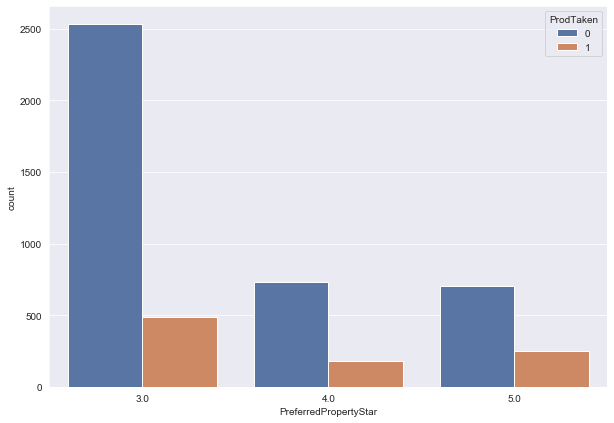

In [ ]:
sns.set({'figure.figsize':(10,7)})
sns.countplot(hue='ProdTaken',x='PreferredPropertyStar',data=tourism)
plt.show()

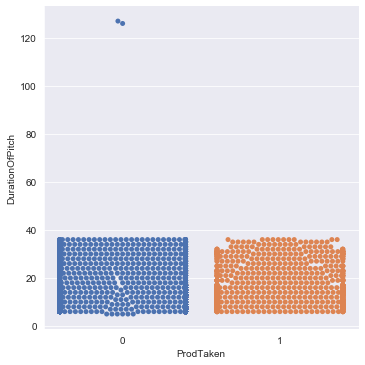

In [ ]:
sns.catplot(x='ProdTaken',y='DurationOfPitch',data=tourism,kind='swarm')
plt.show()

In [ ]:
#lets drop id column. it doesnt add value to the model we will use
tourism.drop(columns='CustomerID',inplace=True)

In [ ]:
tourism.head(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,32.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


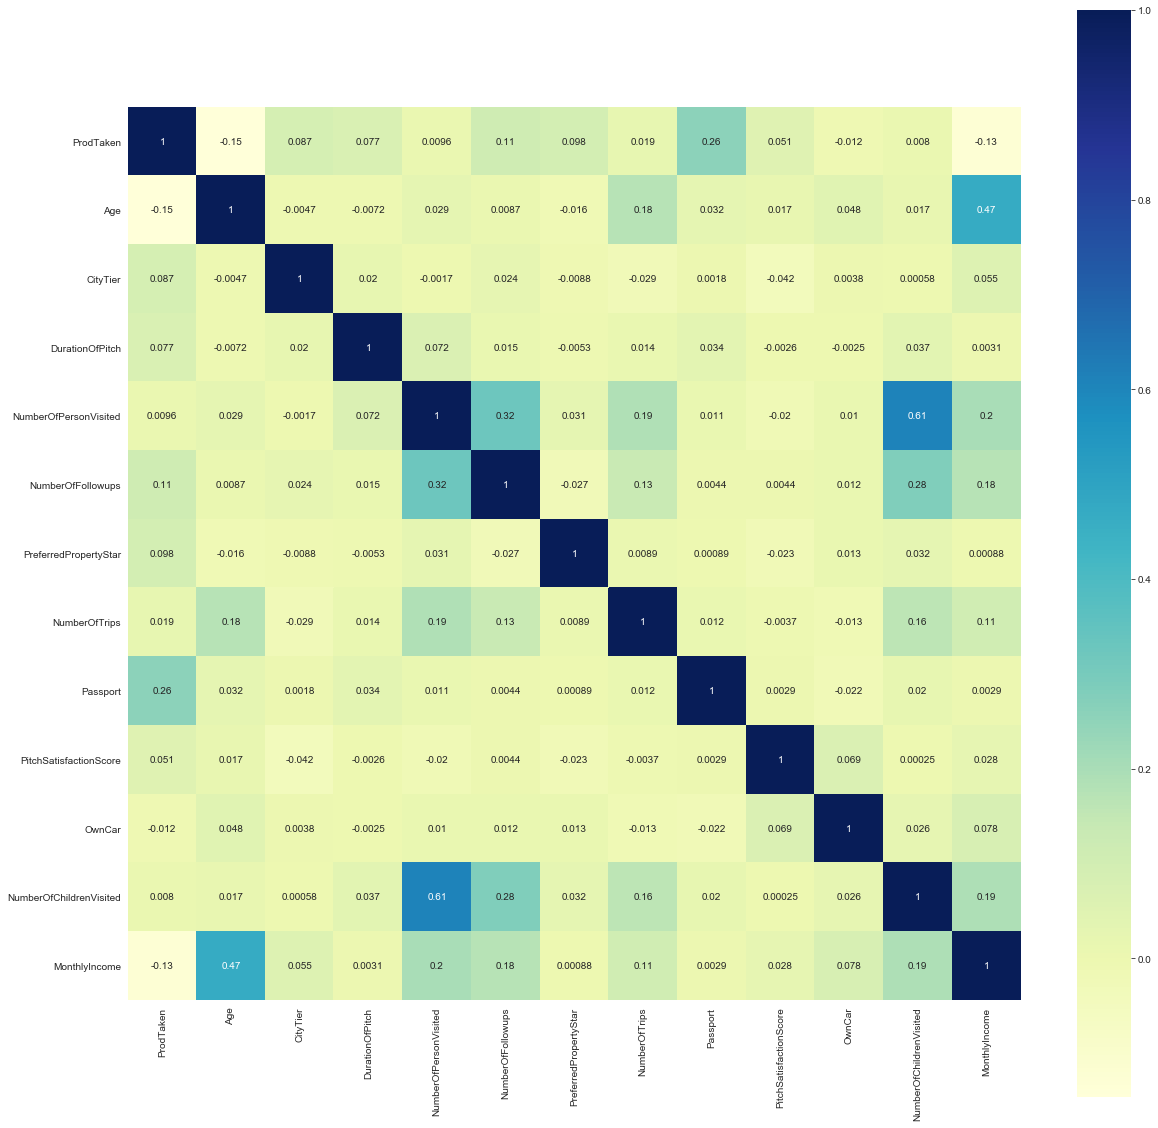

In [ ]:
sns.set({'figure.figsize':(20,20)})
sns.heatmap(tourism.corr(),
           annot=True,
           cmap='YlGnBu',
           square=True)
plt.show()

1. Age and monthly income are positively correlated
2. Number of Person visited and Number of Children visited are also positively correlated. 

In [ ]:
oneHotcols = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']

In [ ]:
tourism = pd.get_dummies(tourism, columns=oneHotcols)
tourism.head(10)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,1,0,0,0,1,0,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,0,1,0,0,0,0,0,1,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,1,0,0,1,0,0,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,1,0,0,0,0,1,0,0,0
4,0,32.0,1,8.0,2,3.0,4.0,1.0,0,5,...,0,1,0,0,0,0,1,0,0,0
5,0,32.0,1,8.0,3,3.0,3.0,1.0,0,5,...,0,0,0,1,0,0,1,0,0,0
6,0,59.0,1,9.0,2,2.0,5.0,5.0,1,2,...,0,1,0,0,0,0,1,0,0,0
7,0,30.0,1,30.0,3,3.0,3.0,2.0,0,2,...,0,0,1,0,0,0,1,0,0,0
8,0,38.0,1,29.0,2,4.0,3.0,1.0,0,3,...,0,0,0,0,1,0,0,0,1,0
9,0,36.0,1,33.0,3,3.0,3.0,7.0,0,3,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
#lets split the data
X = tourism.drop('ProdTaken',axis=1)
y = tourism['ProdTaken']

Since the ProdTaken (dependent variable) is unbalanced, we are using stratify when splitting the data to ensure relative frequencies are same in train and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [ ]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.811751
1    0.188249
Name: ProdTaken, dtype: float64
0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64


Train and Test has same % of data.

In [ ]:
def confusion_matrix(model,y_actual,label=[0,1]):
    y_pred = model.predict(X_test)
    confmatrix = metrics.confusion_matrix(y_actual, y_pred, labels=[0, 1])
    confmatrix_df = pd.DataFrame(confmatrix, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                confmatrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         confmatrix.flatten()/np.sum(confmatrix)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(confmatrix_df, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def model_score(model,flag=True):
    #list to store train and test results
    score_list = []
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    acc_train = model.score(X_train,y_train)
    acc_test = model.score(X_test,y_test)
    
    recall_train = metrics.recall_score(y_train,pred_train)
    recall_test = metrics.recall_score(y_test,pred_test)
    
    precision_train = metrics.precision_score(y_train,pred_train)
    precision_test = metrics.precision_score(y_test,pred_test)
    
    #r2_train = metrics.r2_score(y_train,pred_train)
    #r2_test = metrics.r2_score(y_test,pred_test)
    
    #rmse_train = np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    #rmse_test = np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    score_list.extend((acc_train,acc_test,recall_train,recall_test,precision_train,precision_test))
    
    if flag == True: 
        print("Accuracy on training set : ",acc_train)
        print("Accuracy on test set : ",acc_test)
        print("Recall on training set : ",recall_train)
        print("Recall on test set : ",recall_test)
        print("Precision on training set : ",precision_train)
        print("Precision on test set : ",precision_test)
        
    return score_list     
        

### Bagging Classifier

In [ ]:
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

In [ ]:
bagging_estimator_score = model_score(bagging_estimator)

Accuracy on training set :  0.9944460684010523
Accuracy on test set :  0.9113837764144512
Recall on training set :  0.9736024844720497
Recall on test set :  0.6123188405797102
Precision on training set :  0.9968203497615262
Precision on test set :  0.8802083333333334


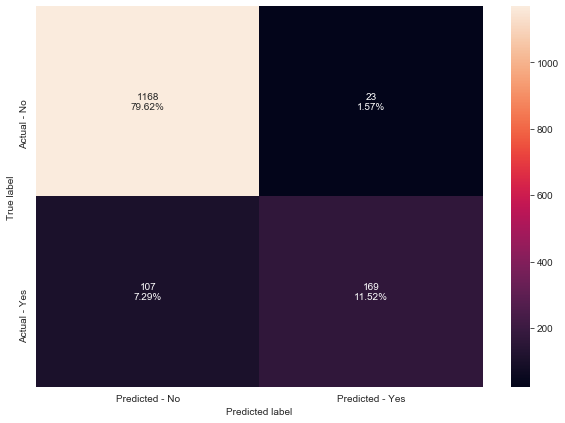

In [ ]:
confusion_matrix(bagging_estimator,y_test)

Accuracy on training set is almost 100%, which indicates the model is overfitted. Not surprisingly, the data performed bad in test data with a recall score of just 61% as against 97% in training set.

### Random Forest Classifier 

In [ ]:
rand_forest_estimator = RandomForestClassifier(random_state=1)
rand_forest_estimator.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
rand_forest_estimator_score = model_score(rand_forest_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9154737559645535
Recall on training set :  1.0
Recall on test set :  0.5905797101449275
Precision on training set :  1.0
Precision on test set :  0.9367816091954023


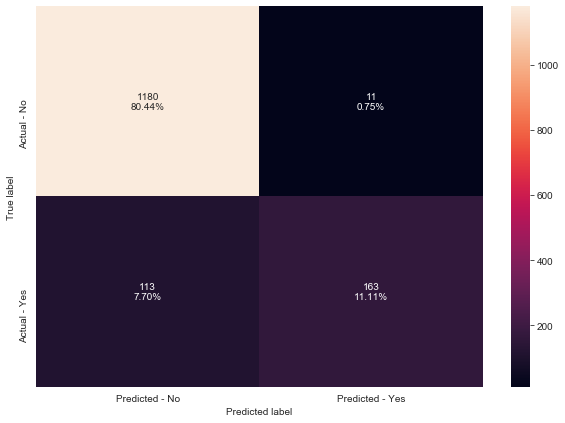

In [ ]:
confusion_matrix(rand_forest_estimator,y_test)

Again, the model has overfitted the data in training set and performed poorly with test set with a recall score of just 59%

Both models has a low recall score with default parameters. And both models have overfitted the data which is expected.

#### Lets try with some hypertuning

In [ ]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=0.9, max_samples=0.9, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

In [ ]:
bagging_estimator_tuned_score = model_score(bagging_estimator_tuned)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9195637355146558
Recall on training set :  0.9984472049689441
Recall on test set :  0.6304347826086957
Precision on training set :  1.0
Precision on test set :  0.9157894736842105


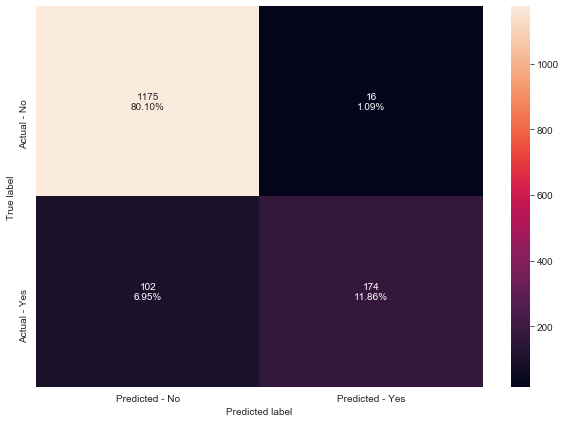

In [ ]:
confusion_matrix(bagging_estimator_tuned,y_test)

Recall with hyperparameter is a little better compared to bagging and random forest models.
But the model is again overfitting the data. Train accuracy and recall are much higher than test accuracy and recall.

#### Bagging with Logisitic Regression as a base estimator

In [ ]:
bagging_logreg = BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_logreg.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=1,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=1, verbo

In [ ]:
bagging_logreg_score = model_score(bagging_logreg)

Accuracy on training set :  0.8360128617363344
Accuracy on test set :  0.8289025221540559
Recall on training set :  0.17701863354037267
Recall on test set :  0.15217391304347827
Precision on training set :  0.7862068965517242
Precision on test set :  0.711864406779661


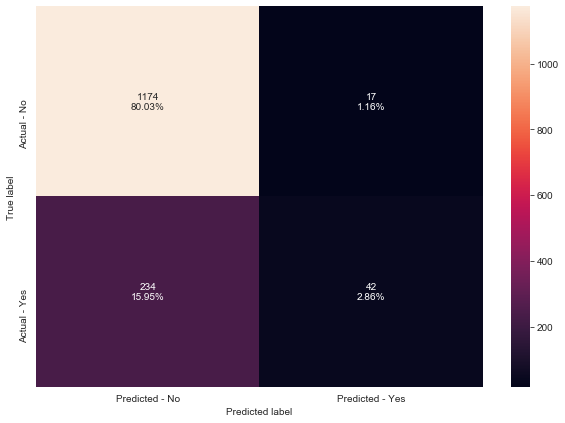

In [ ]:
confusion_matrix(bagging_logreg,y_test)

Bagging with Logistic Regressions as the base estimator doesn't seem to overfit the data. But the recall score is very low. 

#### Random Forest with class weights

In [ ]:
# Choose the type of classifier. 
randforest_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(randforest_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
randforest_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
randforest_estimator_weighted.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
randforest_estimator_weighted_score = model_score(rf_estimator_weighted)

In [ ]:
confusion_matrix(rf_estimator_weighted,y_test)

#### Feature Importance for Random Forest

In [ ]:
importances = randforest_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Comparing models 

In [ ]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,bagging_logreg,rand_forest_estimator]
          #randforest_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = model_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_table = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LogReg', 'Random Forest with deafult parameters'],
                                         #'Tuned Random Forest Classifier','Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_table

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,0.99,0.91,0.97,0.61,1.00,0.88
1,Tuned Bagging Classifier,1.00,0.92,1.00,0.63,1.00,0.92
2,Bagging classifier with base_estimator=LogReg,0.84,0.83,0.18,0.15,0.79,0.71
3,Random Forest with deafult parameters,1.00,0.92,1.00,0.59,1.00,0.94


### AdaBoost Classifier

In [ ]:
adaboostc = AdaBoostClassifier(random_state=1)
adaboostc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [ ]:
adaboostc_score = model_score(adaboostc)

Accuracy on training set :  0.8462437883659749
Accuracy on test set :  0.8404907975460123
Recall on training set :  0.3090062111801242
Recall on test set :  0.2826086956521739
Precision on training set :  0.7107142857142857
Precision on test set :  0.6842105263157895


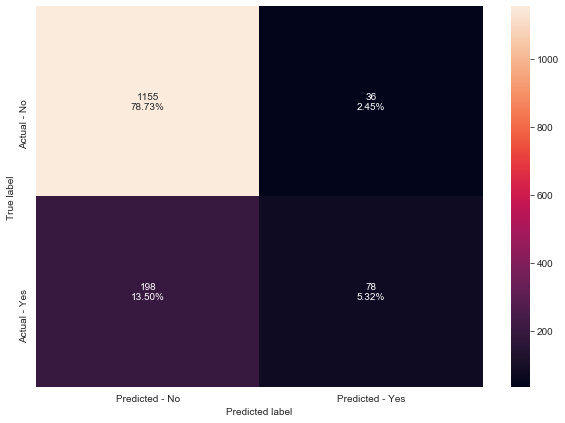

In [ ]:
confusion_matrix(adaboostc,y_test)

Adaboost is not overfitting the data. However, recall score is pretty low both in training and test data.

### Gradient Boosting Classifier

In [ ]:
gradientboostc = GradientBoostingClassifier(random_state=1)
gradientboostc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gradientboostc_score = model_score(gradientboostc)

Accuracy on training set :  0.8851213095586086
Accuracy on test set :  0.8704839809134287
Recall on training set :  0.4503105590062112
Recall on test set :  0.4057971014492754
Precision on training set :  0.8814589665653495
Precision on test set :  0.8115942028985508


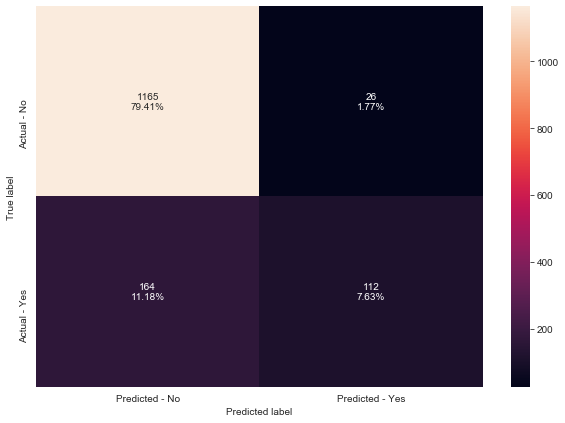

In [ ]:
confusion_matrix(gradientboostc,y_test)

Gradient Boost Classifier performed a little better than AdaBoost in recall value. But recall of test is less than the training set. 

### XGBoost Classifier 

In [ ]:
xgboostc = XGBClassifier(random_state=1)
xgboostc.fit(X_train,y_train)

[08:58:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [ ]:
xgboostc_score = model_score(xgboostc)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9304703476482618
Recall on training set :  0.9984472049689441
Recall on test set :  0.7101449275362319
Precision on training set :  1.0
Precision on test set :  0.8990825688073395


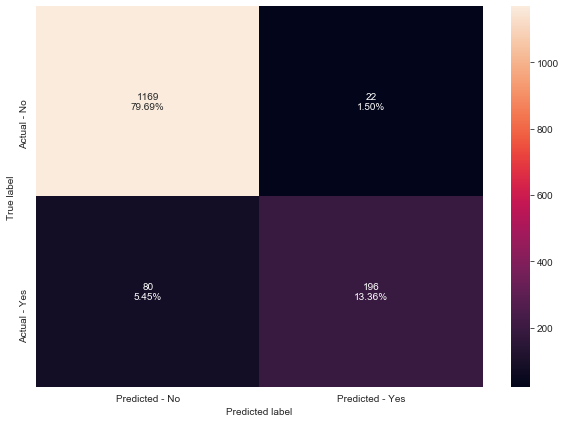

In [ ]:
confusion_matrix(xgboostc,y_test)

- AdaBoost has the least recall score
- XGBoost has a higher recall score but the model is overfitting the data evident from accuracy on training set
- Gradient Boost seem to have a better recall with no overfitting

### Hyperparameter tuning 

### Adaboost 

In [ ]:
# Choose the type of classifier. 
adaboostc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(adaboostc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
adaboostc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
adaboostc_tuned.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
adaboostc_tuned_score = model_score(adaboostc_tuned)

In [ ]:
confusion_matrix(adaboostbc_tuned,y_test)

In [ ]:
importances = adaboostc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Gradient Boost Classifier 

In [ ]:
# init used to predict initial predictions
gradientboostc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gradientboostc_init.fit(X_train,y_train)

In [ ]:
gradientboostc_init_score = model_score(gradientboostc_init)

In [ ]:
# Choose the type of classifier. 
gradientboostc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gradientboostc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
gradientboostc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gradientboostc_tuned.fit(X_train, y_train)

In [ ]:
gradientboostc_tuned_score = model_score(gradientboostc_tuned)

In [ ]:
confusion_matrix(gradientboostc_tuned,y_test)

In [ ]:
importances = gradientboostc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### XGBoost Classifier 

In [ ]:
# Choose the type of classifier. 
xgboostc_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgboostc_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
xgboostc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgboostc_tuned.fit(X_train, y_train)

In [ ]:
xgboostc_tuned_score = model_score(xgboostc_tuned)

In [ ]:
make_confusion_matrix(xgboostc_tuned,y_test)

In [ ]:
importances = xgboostc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# defining list of models
#models = [adaboostc, adaboostc_tuned, gradientboostc, gradientboostc_init, gradientboostc_tuned, xgboostc, xgboostc_tuned]

models = [adaboostc, gradientboostc, xgboostc]


# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = model_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
#comparison_table2 = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
#                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
#                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
#                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
#                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
#                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
#comparison_table2

In [ ]:
comparison_table2 = pd.DataFrame({'Model':['AdaBoost with default paramters','Gradient Boosting with default parameters','XGBoost with default parameters'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_table2

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.85,0.84,0.31,0.28,0.71,0.68
1,Gradient Boosting with default parameters,0.89,0.87,0.45,0.41,0.88,0.81
2,XGBoost with default parameters,1.00,0.93,1.00,0.71,1.00,0.90


### Summary 

- Between Bagging and Random Forest classifiers, both seem to be not predicting the customers who purchased the travel package very well. Default and tuned models seems to be overfitting the data

- Bagging with Logistic Regression as base estimator does not overfit the data. But it has a very poor recall score. It works very well in predicting customers who will not purhase the travel package though

- Comparing AdaBoost vs GradientBoost vs XGBoost, we see XGBoost overfitting the data. AdaBoost and GradientBoost have similar train and test accuract score. Test recall of GradientBoost is a little better than the test recall of AdaBoost

- I noticed that the ProductPitched is 1-1 to the Designation. Looks like the company decides for themselves which package to offer for customers. While this makes sense to some extent, some customers (Executives or Managers) may be willing to spend a little more for Super Deluxe or King package. It may be worth giving them the option to choose from different packages.